In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [5]:
using JSON

cross_validation_best_key_Jul_AM = readall("../temp_files/cross_validation_best_key_Jul_AM.json")
cross_validation_best_key_Jul_AM = JSON.parse(cross_validation_best_key_Jul_AM)

cross_validation_best_key_Jul_MD = readall("../temp_files/cross_validation_best_key_Jul_MD.json")
cross_validation_best_key_Jul_MD = JSON.parse(cross_validation_best_key_Jul_MD)

cross_validation_best_key_Jul_PM = readall("../temp_files/cross_validation_best_key_Jul_PM.json")
cross_validation_best_key_Jul_PM = JSON.parse(cross_validation_best_key_Jul_PM)

cross_validation_best_key_Jul_NT = readall("../temp_files/cross_validation_best_key_Jul_NT.json")
cross_validation_best_key_Jul_NT = JSON.parse(cross_validation_best_key_Jul_NT)

cross_validation_best_key_Jul_weekend = readall("../temp_files/cross_validation_best_key_Jul_weekend.json")
cross_validation_best_key_Jul_weekend = JSON.parse(cross_validation_best_key_Jul_weekend)

"(8,0.5,10000.0,1)"

In [6]:
coeffs_dict_Jul_AM = readall("../temp_files/coeffs_dict_Jul_AM.json")
coeffs_dict_Jul_AM = JSON.parse(coeffs_dict_Jul_AM)

coeffs_dict_Jul_MD = readall("../temp_files/coeffs_dict_Jul_MD.json")
coeffs_dict_Jul_MD = JSON.parse(coeffs_dict_Jul_MD)

coeffs_dict_Jul_PM = readall("../temp_files/coeffs_dict_Jul_PM.json")
coeffs_dict_Jul_PM = JSON.parse(coeffs_dict_Jul_PM)

coeffs_dict_Jul_NT = readall("../temp_files/coeffs_dict_Jul_NT.json")
coeffs_dict_Jul_NT = JSON.parse(coeffs_dict_Jul_NT)

coeffs_dict_Jul_weekend = readall("../temp_files/coeffs_dict_Jul_weekend.json")
coeffs_dict_Jul_weekend = JSON.parse(coeffs_dict_Jul_weekend)


coeffs_best_Jul_AM = coeffs_dict_Jul_AM[cross_validation_best_key_Jul_AM]
coeffs_best_Jul_MD = coeffs_dict_Jul_MD[cross_validation_best_key_Jul_MD]
coeffs_best_Jul_PM = coeffs_dict_Jul_PM[cross_validation_best_key_Jul_PM]
coeffs_best_Jul_NT = coeffs_dict_Jul_NT[cross_validation_best_key_Jul_NT]
coeffs_best_Jul_weekend = coeffs_dict_Jul_weekend[cross_validation_best_key_Jul_weekend]

9-element Array{Any,1}:
  1.0      
 -0.0046171
  0.0535427
 -0.201109 
  0.623062 
 -0.898409 
  0.954502 
 -0.463093 
  0.111308 

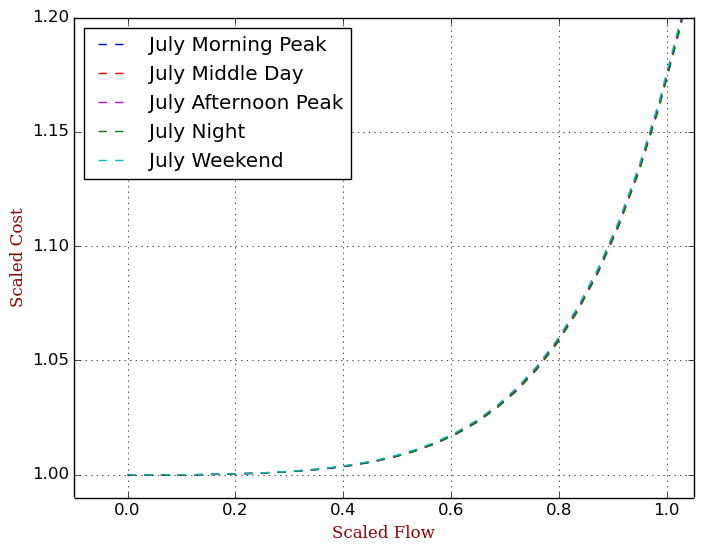

In [7]:
using PyPlot

xs = linspace(0, 1.1, 30)

ys_Jul_AM = map(x->polyEval(coeffs_best_Jul_AM, x), xs)
ys_Jul_MD = map(x->polyEval(coeffs_best_Jul_MD, x), xs)
ys_Jul_PM = map(x->polyEval(coeffs_best_Jul_PM, x), xs)
ys_Jul_NT = map(x->polyEval(coeffs_best_Jul_NT, x), xs)
ys_Jul_weekend = map(x->polyEval(coeffs_best_Jul_weekend, x), xs)

plot(xs, ys_Jul_AM, "--b", label="July Morning Peak")
plot(xs, ys_Jul_MD, "--r", label="July Middle Day")
plot(xs, ys_Jul_PM, "--m", label="July Afternoon Peak")
plot(xs, ys_Jul_NT, "--g", label="July Night")
plot(xs, ys_Jul_weekend, "--c", label="July Weekend")

legend(loc="upper left") 

grid("on")
xlim(-0.1, 1.05);
ylim(0.99, 1.2);

font1 = ["family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Jul.pdf")

In [8]:
cross_validation_best_key_Jul_MD

"(8,0.5,1.0,1)"